In [313]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import nltk
file_path = "result.json"
with open(file_path, 'r', encoding='utf-8') as file:
    df = json.load(file)
data=pd.DataFrame(df['messages'])

In [314]:
data_=data[['date','from','text']]
data_.dropna(inplace=True)
message_counts = data['from'].value_counts().reset_index()
message_counts.columns = ['from', 'message_count']

C:\Users\alogi\AppData\Local\Temp\ipykernel_23572\479711788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_.dropna(inplace=True)


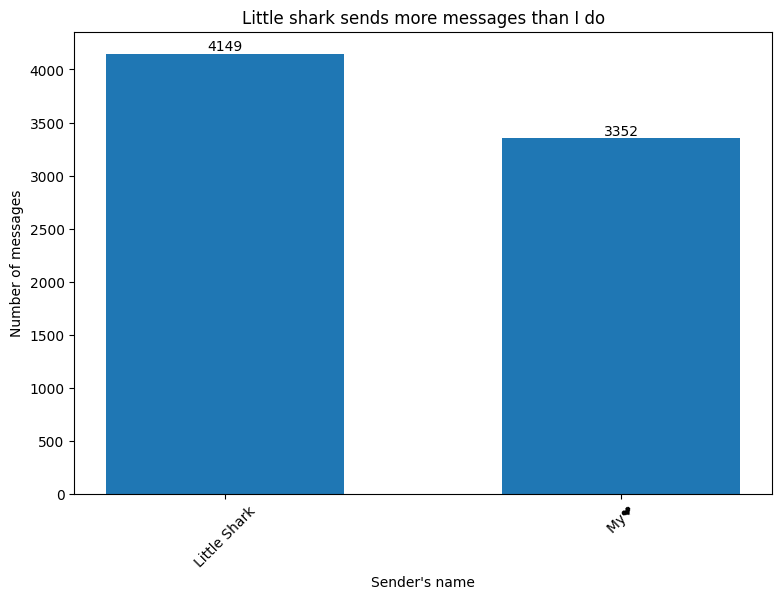

In [315]:
plt.figure(figsize=(9, 6))
plt.bar(message_counts['from'], message_counts['message_count'],width=0.6)
plt.xlabel("Sender's name")
plt.ylabel('Number of messages')
plt.title('Little shark sends more messages than I do')
plt.xticks(rotation=45)
for index, value in enumerate(message_counts['message_count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


In [316]:
import emoji
import re
import string
data_emoj=data_[['from','text']]
data_emoj['Emoji']=None

def extract_emojis(text):
    if isinstance(text, str):
        # Извлеките эмоджи из текста
        emojis = ''.join(re.findall(r'[^\w\s,’]', text))
        # Удалите знаки пунктуации из эмоджи
        emojis_without_punctuation = ''.join(char for char in emojis if char not in string.punctuation)
        return emojis_without_punctuation
    else:
        return ''

data_emoj['Emoji'] = data_emoj['text'].apply(extract_emojis)
data_emoj = data_emoj[data_emoj['text'].str.strip() != '']


In [318]:
data_emoj.head()

,from,text,Emoji
1,Little Shark,Hello handsome🌻,🌻
3,Little Shark,You’re cute,
8,Little Shark,You’re gonna have to read sometimes😂 they migh...,😂
10,My❤️,For all night,
11,Little Shark,"Oki, deal",


In [319]:
data_emoj['Emoji-'] = data_emoj['Emoji'].str.split()

# Создайте список всех уникальных эмоджи
all_emojis = set(emoji for emojis in data_emoj['Emoji-'] for emoji in emojis)

for emoji in all_emojis:
    data_emoj[emoji] = data_emoj['Emoji-'].apply(lambda x: x.count(emoji))

emoji_usage_by_person = data_emoj.groupby('from')[list(all_emojis)].sum().reset_index()



In [335]:
row_data = emoji_usage_by_person.loc[0]

# Using .iloc[] to select by integer location (0 in this case)
row_data = emoji_usage_by_person.iloc[0]

# Create a new DataFrame from the selected row
new_data = pd.DataFrame(row_data).T

In [336]:
new_data

,from,🍾,✨✨,😂😂😂😂😂,🫶🏼,“”😂,✨,😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,🎉🎉🎉,...,😂🤌🏼,😎,💕,“”,👌,🔥,😂😂😂🌻😂😂🚿,🌈,🥹,…
0,Little Shark,2,1,0,7,2,1,0,0,1,...,1,2,0,14,0,0,0,1,4,0
